# City of Toronto Bicycle Network Data

The Cycling Network dataset from the City of Toronto provides geospatial data on existing, planned, and proposed cycling infrastructure across the city. It includes detailed information about bike lanes, multi-use trails, and shared roadways, with = installation year, street names, road classification, and geometry. This dataset supports urban planning, transportation analysis, and cycling route visualization.

## Setup Notebook

In [4]:
# Import 3rd party libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from IPython.display import display
import json

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

## Import City of Toronto Cycling Network GeoJson Data

This GeoJSON file contains 1,464 rows, each representing a segment of Toronto's cycling network.

In [85]:
# Import dataset as a GeoDataFrame
bicycle_data = gpd.read_file('cycling-network - 4326.geojson')

# View GeoDataFrame
bicycle_data.head()

,_id,OBJECTID,SEGMENT_ID,INSTALLED,UPGRADED,PRE_AMALGAMATION,STREET_NAME,FROM_STREET,TO_STREET,ROADCLASS,...,INFRA_HIGHORDER,SEPA_HIGHORDER,SEPB_HIGHORDER,ORIG_HIGHORDER,BYLAWED,EDITOR,LAST_EDIT_DATE,UPGRADE_DESCRIPTION,CONVERTED,geometry
0,1,1,1,2001,2021,,Kilbarry Rd,Highbourne Rd,Oriole Pkwy,,...,Sharrows - Wayfinding,,,,,,2024-06-11 16:40:31,,2007,"MULTILINESTRING ((-79.40351 43.69526, -79.4030..."
1,2,2,2,2001,2009,,Martin Goodman / Waterfront Trl,Lake Shore Blvd W,Martin Goodman Trl Branch,,...,Multi-Use Trail,,,,,,2024-06-11 16:40:31,,,"MULTILINESTRING ((-79.40364 43.63499, -79.4035..."
2,3,3,3,2001,2011,,Gatineau Hydro Corridor Trl,Givendale Rd,Kennedy Rd,,...,Multi-Use Trail,,,,,,2024-06-11 16:40:31,,,"MULTILINESTRING ((-79.27522 43.74158, -79.2751..."
3,4,4,4,2001,2011,,G Ross Lord Park Trl,Dufferin St,G Ross Lord Park Trl Branch,,...,Multi-Use Trail,,,,,,2024-06-11 16:40:31,,,"MULTILINESTRING ((-79.46772 43.77208, -79.4675..."
4,5,5,5,2001,2012,,Etobicoke Creek Trl,Etobicoke Creek Trl Branch,Forty Third St,,...,Multi-Use Trail - Entrance,,,,,,2024-06-11 16:40:31,,,"MULTILINESTRING ((-79.54812 43.59027, -79.5480..."


## Data Analysis

In [9]:
# Check the number of columns and rows
bicycle_data.shape

(1464, 29)

In [91]:
# Check the columns in DataFrame
bicycle_data.columns

Index(['_id', 'OBJECTID', 'SEGMENT_ID', 'INSTALLED', 'UPGRADED',
       'PRE_AMALGAMATION', 'STREET_NAME', 'FROM_STREET', 'TO_STREET',
       'ROADCLASS', 'CNPCLASS', 'SURFACE', 'OWNER', 'DIR_LOWORDER',
       'INFRA_LOWORDER', 'SEPA_LOWORDER', 'SEPB_LOWORDER',
       'ORIG_LOWORDER_INFRA', 'DIR_HIGHORDER', 'INFRA_HIGHORDER',
       'SEPA_HIGHORDER', 'SEPB_HIGHORDER', 'ORIG_HIGHORDER', 'BYLAWED',
       'EDITOR', 'LAST_EDIT_DATE', 'UPGRADE_DESCRIPTION', 'CONVERTED',
       'geometry'],
      dtype='object')

In [93]:
# Check the columns in the DataFrame
print("Columns in the DataFrame:")
print(bicycle_data.columns)

# Check the number of columns and rows
print("\nNumber of rows and columns in the DataFrame:")
print(bicycle_data.shape)

Columns in the DataFrame:
Index(['_id', 'OBJECTID', 'SEGMENT_ID', 'INSTALLED', 'UPGRADED',
       'PRE_AMALGAMATION', 'STREET_NAME', 'FROM_STREET', 'TO_STREET',
       'ROADCLASS', 'CNPCLASS', 'SURFACE', 'OWNER', 'DIR_LOWORDER',
       'INFRA_LOWORDER', 'SEPA_LOWORDER', 'SEPB_LOWORDER',
       'ORIG_LOWORDER_INFRA', 'DIR_HIGHORDER', 'INFRA_HIGHORDER',
       'SEPA_HIGHORDER', 'SEPB_HIGHORDER', 'ORIG_HIGHORDER', 'BYLAWED',
       'EDITOR', 'LAST_EDIT_DATE', 'UPGRADE_DESCRIPTION', 'CONVERTED',
       'geometry'],
      dtype='object')

Number of rows and columns in the DataFrame:
(1464, 29)


From the website that this data was obtained from (https://open.toronto.ca/dataset/cycling-network/), the columns describe the following:

- id: A unique identifier for each record. Typically used to uniquely reference each row in the dataset.
- OBJECTID: Another unique identifier, often used in geographic or GIS datasets to represent the object in a spatial database. This ID helps to track features in the system.
- SEGMENT_ID:An identifier for a specific segment of road, street, or infrastructure. It likely refers to a portion of a larger infrastructure asset, useful for analysis of road conditions or maintenance.
- INSTALLED:The date or year when the infrastructure (e.g., road, street feature, or installation) was installed. This can be important for asset management and aging infrastructure analysis.
- UPGRADED: Indicates whether the infrastructure has been upgraded, often with a specific date or year of the upgrade. This field is useful for understanding the timeline of infrastructure improvements.
- PRE_AMALGAMATION: A flag or value indicating whether the feature existed before a certain amalgamation event (e.g., before the merging of municipalities, districts, or other administrative boundaries).
- STREET_NAME: The name of the street or road that the feature corresponds to. This is crucial for identifying and mapping locations.
- FROM_STREET: The starting street or intersection for a particular road segment. It helps in defining the segment's geographic location and orientation.
- TO_STREET: The ending street or intersection for the road segment. This, together with the FROM_STREET, helps define the entire segment’s extent.
- ROADCLASS: The classification of the road based on factors like its size, importance, and traffic capacity (e.g., arterial, residential, highway). This can help in traffic planning and infrastructure management.
- CNPCLASS: Likely refers to a specific classification type relevant to the road or asset (could be related to a "CNP" code system, which might relate to "Class of Network Plan" or something similar, depending on local regulations or standards).
- SURFACE:The type of surface material for the road (e.g., asphalt, concrete, gravel). This helps in maintenance planning and determining the durability of the road.
- OWNER: The entity or agency that owns the infrastructure asset. This could refer to municipal, provincial, or private ownership, and is important for responsibility and asset management.
- DIR_LOWORDER: A directional classification, likely referring to the "low order" roads or lanes within a given system (possibly lower-traffic or smaller roads in a hierarchy).
- INFRA_LOWORDER: Indicates infrastructure components that are part of the lower-order (or minor) part of the road system. These could be related to smaller roads, curbs, or other features.
- SEPA_LOWORDER:May refer to a low-order separation feature such as sidewalks or barriers, depending on local definitions. Could be part of a classifying system for features in road infrastructure.
- SEPB_LOWORDER: Similar to SEPA_LOWORDER, this likely refers to another kind of separation feature (e.g., barriers or buffers) associated with lower-order roads.
- ORIG_LOWORDER_INFRA: Refers to the original infrastructure classification for low-order roads or features. This might track historical data or previous classifications before any changes or upgrades were made.
- DIR_HIGHORDER: A directional classification for higher-order roads or lanes (e.g., major highways, arterial roads). These roads typically handle more traffic and are crucial for transportation planning.
- INFRA_HIGHORDER: Refers to infrastructure components associated with high-order roads, such as major roadways, highways, and interchanges.
- SEPA_HIGHORDER: A separation feature for higher-order roads, which could include things like dividers, buffers, or barriers designed for major roadways.
- SEPB_HIGHORDER: Similar to SEPA_HIGHORDER, but might refer to a different type or class of separation feature (e.g., barriers or safety features) for high-order roads.
- ORIG_HIGHORDER: The original classification or state of the high-order infrastructure, before any changes, upgrades, or reclassification.
- BYLAWED:
This field could indicate whether the infrastructure feature is subject to specific bylaws or regulations (e.g., zoning or building codes). It may signify restrictions or requirements tied to the feature.
- EDITOR:T he name or ID of the person or entity who last edited or modified the record. This is important for tracking changes and maintaining the integrity of the data.
- LAST_EDIT_DATE:The date when the feature was last modified or updated. It helps track the freshness of the data and when changes were made.
- UPGRADE_DESCRIPTION: A description of any upgrades or improvements that have been made to the infrastructure. This could include road widening, resurfacing, or additions of new features.
- CONVERTED :A flag or value indicating whether the infrastructure feature has been converted to another type, such as from one road class to another or from one material to another.
- geometry:The geometric representation of the infrastructure feature, typically stored as Shapely geometry objects. This column contains spatial data (points, lines, or polygons) that represent the physical location and shape of the asset.


We must first drop unnecessary columns. 

In [12]:
# Drop uncorrelated and unnecessary columns 
bicycle_data = bicycle_data.drop(columns=[
    'OBJECTID',
    'SEGMENT_ID',                   
    'PRE_AMALGAMATION',      
    'FROM_STREET',              
    'TO_STREET',               
    'CNPCLASS',               
    'SURFACE',
    'INFRA_HIGHORDER', 
    'OWNER',              
    'DIR_LOWORDER',             
    'SEPA_LOWORDER',             
    'SEPB_LOWORDER',        
    'ORIG_LOWORDER_INFRA',          
    'DIR_HIGHORDER',             
    'SEPA_HIGHORDER',
    'SEPB_HIGHORDER',
    'ORIG_HIGHORDER',
    'BYLAWED',
    'EDITOR',
    'LAST_EDIT_DATE',
    'UPGRADE_DESCRIPTION',
    'CONVERTED',
    'ROADCLASS'
], errors='ignore')

# Check if columns are removed 
bicycle_data.columns

Index(['_id', 'INSTALLED', 'UPGRADED', 'STREET_NAME', 'INFRA_LOWORDER',
       'geometry'],
      dtype='object')

In [13]:
# Check data types per column
print(bicycle_data.dtypes)

_id                  int32
INSTALLED            int32
UPGRADED             int32
STREET_NAME         object
INFRA_LOWORDER      object
geometry          geometry
dtype: object


In [14]:
# Check numerical statistics for each column
bicycle_data.describe()

,_id,INSTALLED,UPGRADED
count,1464.00000,1464.000000,1464.000000
mean,732.50000,1987.971311,425.721311
std,422.76471,202.477544,823.346828
min,1.00000,0.000000,0.000000
25%,366.75000,2001.000000,0.000000
50%,732.50000,2006.000000,0.000000
75%,1098.25000,2015.000000,0.000000
max,1464.00000,2024.000000,2023.000000


The installed and upgraded years cannot be zero. For the installed column, it is inferred that the value is zero because it was installed before 2001. Therefore, we will replace every zero in the installed column with 2001. 

In [16]:
# Replace installation year 0 to 2001
bicycle_data['INSTALLED'] = bicycle_data['INSTALLED'].replace(0, 2001)

# Check if replaced
bicycle_data.describe()

,_id,INSTALLED,UPGRADED
count,1464.00000,1464.000000,1464.000000
mean,732.50000,2008.473361,425.721311
std,422.76471,7.647701,823.346828
min,1.00000,2001.000000,0.000000
25%,366.75000,2001.000000,0.000000
50%,732.50000,2006.000000,0.000000
75%,1098.25000,2015.000000,0.000000
max,1464.00000,2024.000000,2023.000000


For upgraded, we infer that the value is zero because the bike route has not been upgraded. We will keep the zero value but we will keep in mind that '0' means 'never upgraded'. 

## Data Cleaning

In [19]:
# Investigate types of bike lanes
bicycle_data['INFRA_LOWORDER'].unique()

array(['Sharrows - Wayfinding', 'Multi-Use Trail',
       'Multi-Use Trail - Entrance', 'Cycle Track', 'Park Road',
       'Sharrows', ' ', 'Bike Lane', '<Null>',
       'Signed Route (No Pavement Markings)',
       'Multi-Use Trail - Existing Connector',
       'Multi-Use Trail - Boulevard', 'Multi-Use Trail - Connector',
       'Bike Lane - Buffered', 'Sharrows - Arterial - Connector',
       'Sharrows - Arterial', '--', '---'], dtype=object)

Several of the bike lane infrastructure are duplicated as you can see above, therefore we will group into four categories: 
1. Protected Bike Lanes or Cycle Tracks: 'Cycle Track'
2. Dedicated Bike Lanes: 'Bike Lane', 'Bike Lane - Buffered'
3. Multi-Use and Park Paths: 'Multi-Use Trail', 'Multi-Use Trail - Entrance', 'Multi-Use Trail - Boulevard', 'Multi-Use Trail - Existing Connector', 'Multi-Use Trail - Connector', 'Park Road'
4. Sharrow: 'Sharrows', 'Sharrows - Wayfinding', 'Sharrows - Arterial - Connector', 'Sharrows - Arterial'
5. Signed Route: 'Signed Route (No Pavement Markings)'
6. Other

In [21]:
def lane_type_rename(string):
    '''
    Input: String
    Output: String
    Description: Renames the type of bike lane based on the six categories outlined above. 
    '''
    # Check which category the bike lane belongs in, return the category name
    if string in ['Bike Lane', 'Bike Lane - Buffered']:
        return 'Dedicated Bike Lane'
    elif string == 'Cycle Track':
        return 'Cycle Track'
    elif string in ['Multi-Use Trail', 'Multi-Use Trail - Entrance', 'Multi-Use Trail - Boulevard', 'Multi-Use Trail - Existing Connector', 'Multi-Use Trail - Connector', 'Park Road']:
        return 'MUP and Park'
    elif string in ['Sharrows', 'Sharrows - Wayfinding', 'Sharrows - Arterial - Connector', 'Sharrows - Arterial']:
        return 'Sharrow'
    elif string == 'Signed Route (No Pavement Markings)':
        return 'Signed Route'
    else:
        return 'Other'

# Run the above function on the INFRA_LOWORDER column, this will rename the lane type as one of the categories
bicycle_data['INFRA_LOWORDER'] = bicycle_data['INFRA_LOWORDER'].apply(lane_type_rename)

# View GeoDataFrame
bicycle_data.head()

,_id,INSTALLED,UPGRADED,STREET_NAME,INFRA_LOWORDER,geometry
0,1,2001,2021,Kilbarry Rd,Sharrow,"MULTILINESTRING ((-79.40351 43.69526, -79.4030..."
1,2,2001,2009,Martin Goodman / Waterfront Trl,MUP and Park,"MULTILINESTRING ((-79.40364 43.63499, -79.4035..."
2,3,2001,2011,Gatineau Hydro Corridor Trl,MUP and Park,"MULTILINESTRING ((-79.27522 43.74158, -79.2751..."
3,4,2001,2011,G Ross Lord Park Trl,MUP and Park,"MULTILINESTRING ((-79.46772 43.77208, -79.4675..."
4,5,2001,2012,Etobicoke Creek Trl,MUP and Park,"MULTILINESTRING ((-79.54812 43.59027, -79.5480..."


In [22]:
# Check for missing values
print(bicycle_data.isnull().sum())


_id               0
INSTALLED         0
UPGRADED          0
STREET_NAME       0
INFRA_LOWORDER    0
geometry          0
dtype: int64


In [23]:
# Check for duplicates
bicycle_data.duplicated().sum()

0

In [24]:
bicycle_data.head()

,_id,INSTALLED,UPGRADED,STREET_NAME,INFRA_LOWORDER,geometry
0,1,2001,2021,Kilbarry Rd,Sharrow,"MULTILINESTRING ((-79.40351 43.69526, -79.4030..."
1,2,2001,2009,Martin Goodman / Waterfront Trl,MUP and Park,"MULTILINESTRING ((-79.40364 43.63499, -79.4035..."
2,3,2001,2011,Gatineau Hydro Corridor Trl,MUP and Park,"MULTILINESTRING ((-79.27522 43.74158, -79.2751..."
3,4,2001,2011,G Ross Lord Park Trl,MUP and Park,"MULTILINESTRING ((-79.46772 43.77208, -79.4675..."
4,5,2001,2012,Etobicoke Creek Trl,MUP and Park,"MULTILINESTRING ((-79.54812 43.59027, -79.5480..."


There are no null values or duplicates in this dataset.

## EDA

#### Here we are going to visualize the different types of bicycle infrastructure and their locations in Toronto

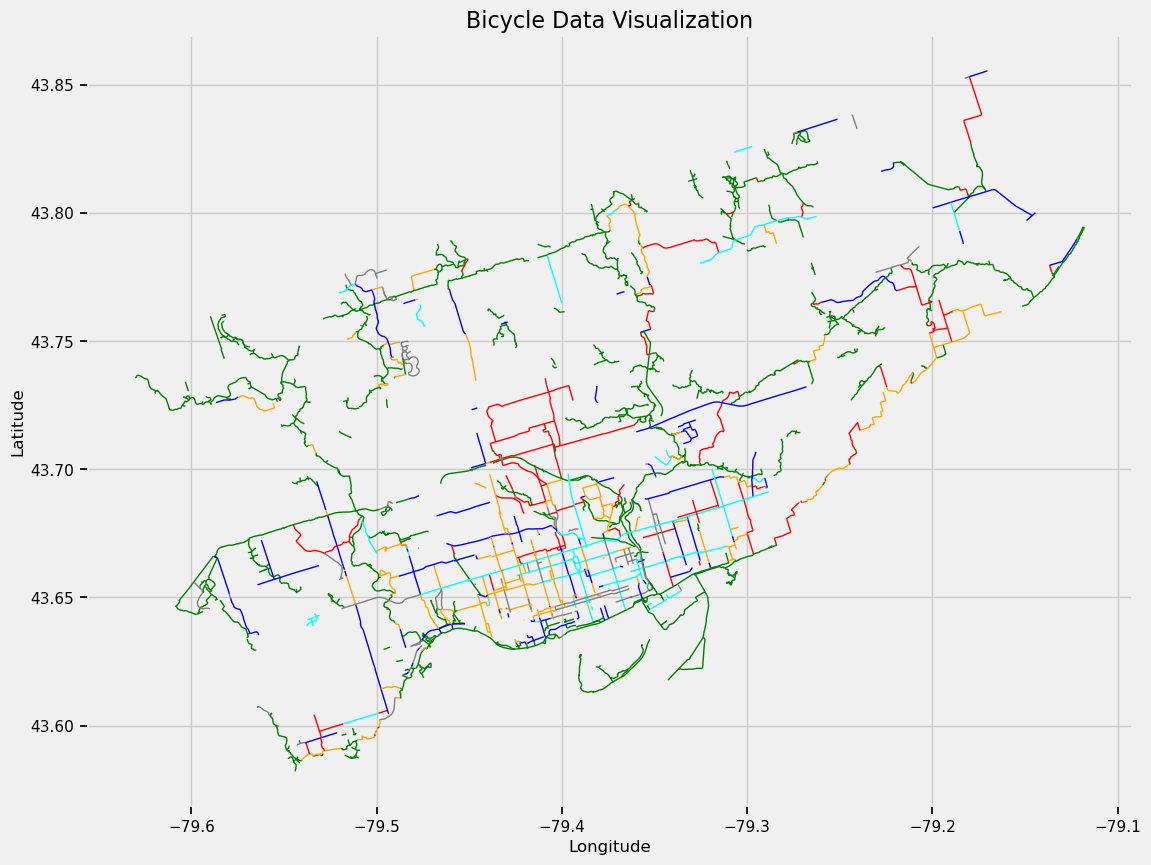

In [28]:
# Assign each category of bike lanes a distinct colour. 
def map_color(bike_path_type):
    '''
    Input: String
    Output: String
    Description: Returns a string with a matplotlib colour code based on the bike lane category.
    '''
    if bike_path_type == 'Signed Route':
        return 'red'
    elif bike_path_type == 'Sharrow':
        return 'orange'
    elif bike_path_type == 'MUP and Park':
        return 'green'
    elif bike_path_type == 'Dedicated Bike Lane':
        return 'blue'
    elif bike_path_type == 'Cycle Track':
        return 'cyan'
    else:
        return 'gray' 

# Create a copy of the bicycle_data DataFrame
bicycle_data_color = bicycle_data.copy()

# Run the above function to assign colors to each bike path 
bicycle_data_color['color'] = bicycle_data['INFRA_LOWORDER'].apply(map_color)

# Create a plot
fig, ax = plt.subplots(figsize=(12, 12))
bicycle_data_color.plot(ax=ax, color=bicycle_data_color['color'], linewidth=1)

plt.title('Bicycle Data Visualization', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

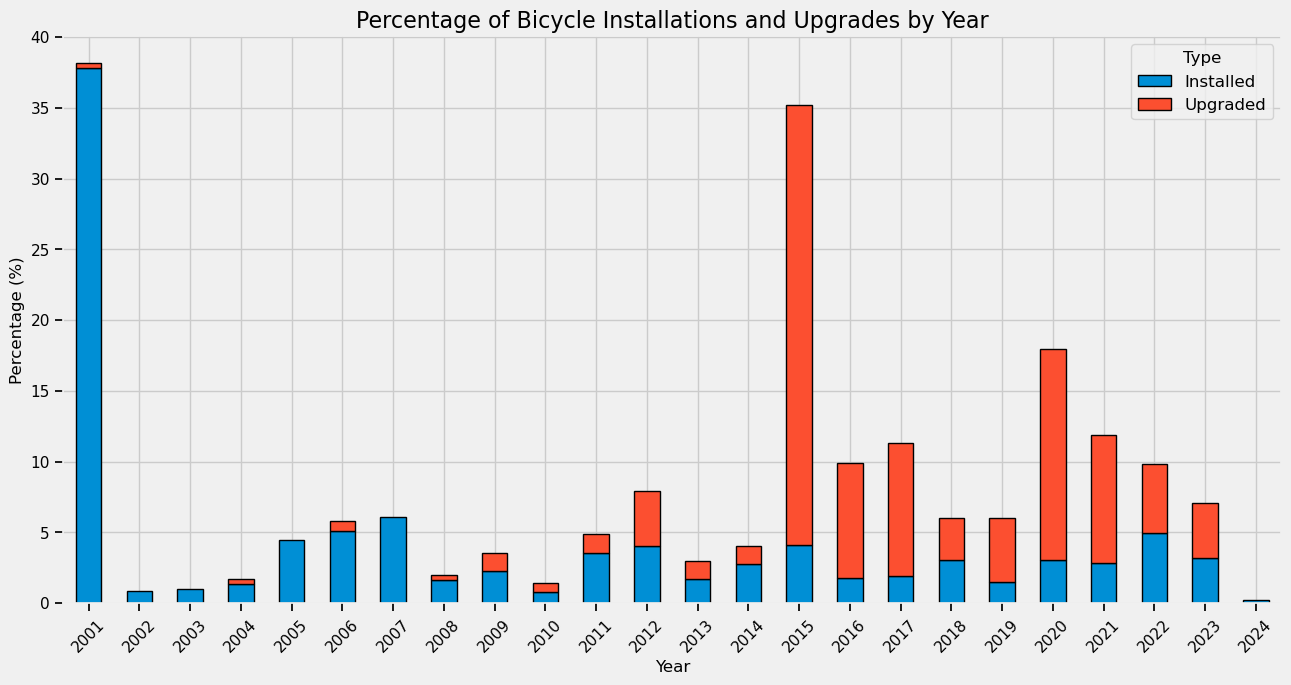

In [29]:
# Filter out UPGRADED years before 2001
filtered_upgraded = bicycle_data[bicycle_data['UPGRADED'] >= 2001]

# Calculate the percentage for INSTALLED years
installation_percentages = bicycle_data['INSTALLED'].value_counts(normalize=True) * 100

# Calculate the percentage for UPGRADED years
upgraded_percentages = filtered_upgraded['UPGRADED'].value_counts(normalize=True) * 100

# Combine the percentages into a single DataFrame
combined_percentages = pd.DataFrame({
    'Installed': installation_percentages,
    'Upgraded': upgraded_percentages
}).fillna(0) 

# Sort the years
combined_percentages = combined_percentages.sort_index()

# Create a stacked bar plot
fig, ax = plt.subplots(figsize=(14, 7))
combined_percentages.plot(kind='bar', stacked=True, ax=ax, edgecolor='black')

plt.title('Percentage of Bicycle Installations and Upgrades by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45)

plt.legend(title='Type', fontsize=12)
plt.show()

## Save as a GeoJson File

In [31]:
output_path = "../Clean Data/bicycle_data.geojson"
bicycle_data.to_file(output_path, driver="GeoJSON")

## Import City of Toronto Ward Shapefile

This dataset contains the City of Toronto ward boundaries in the WGS84 coordinate system. It has already been cleaned in a notebook at this path: New_Project_Directory/CME538_Big-Project_Hackstreet-Boys/Ward Data/Ward Data.ipynb. It is being imported from this path: CME538_Big-Project_Hackstreet-Boys/Clean Data/wards_data.geojson

In [34]:
# Path to the GeoJSON file
geojson_path = "../Clean Data/wards_data.geojson"

# Load the shapefile
wards_data = gpd.read_file(geojson_path)

# View geoDataFrame
wards_data.head()

,WARD NUMBER,WARD NAME,WARD DISTRICT,geometry
0,01,Etobicoke North,Etobicoke York,"POLYGON ((614361.91 4846443.252, 614376.274 48..."
1,02,Etobicoke Centre,Etobicoke York,"POLYGON ((618769.981 4839786.381, 618770.007 4..."
2,03,Etobicoke-Lakeshore,Etobicoke York,"POLYGON ((621184.054 4834315.989, 621213.577 4..."
3,04,Parkdale-High Park,Toronto and East York,"POLYGON ((623660.782 4836061.188, 623724.263 4..."
4,05,York South-Weston,Etobicoke York,"POLYGON ((623361.036 4840391.392, 623364.743 4..."


### Combine Bicycle and Ward Data Using Geospatial Relationships and Operations

First, we must ensure they are in the same coordinate Reference Systems (CRS) in Python / GeoPandas. First, lets see the CRS information for each file.

In [37]:
print (bicycle_data.crs)
print (wards_data.crs)

EPSG:4326
EPSG:32617


We will convert from EPSG:4326 (WGS 84, geographic coordinate system) to EPSG:32617 (UTM Zone 17N, projected coordinate system) because of the following reasons:

- EPSG:4326 uses latitude and longitude in decimal degrees but EPSG:32617 uses meters as units, which will be the ideal unit when we determine the zoning areas in each ward. It can accurately measure the areas of the polygons when we require it to. 
- EPSG:32617 is tailored for regions in UTM Zone 17N, which covers the City of Toronto.

In [39]:
# Convert CRS to EPSG:32617
bicycle_data = bicycle_data.to_crs("EPSG:32617")  
wards_data = wards_data.to_crs("EPSG:32617")

We will use spatial relationships and operation to assign a ward number to each bicyle network by checking which ward(s) it intersects or is contained within. 

In [41]:
# Perform the spatial join
bicycle_ward_data = gpd.sjoin(bicycle_data, wards_data[['WARD NAME', 'WARD NUMBER', 'WARD DISTRICT', 'geometry']], how="inner", predicate="intersects")


# Save or display the resulting GeoDataFrame
bicycle_ward_data.head()

,_id,INSTALLED,UPGRADED,STREET_NAME,INFRA_LOWORDER,geometry,index_right,WARD NAME,WARD NUMBER,WARD DISTRICT
0,1,2001,2021,Kilbarry Rd,Sharrow,"MULTILINESTRING ((628651.515 4839265.273, 6286...",11,Toronto-St. Paul's,12,Toronto and East York
1,2,2001,2009,Martin Goodman / Waterfront Trl,MUP and Park,"MULTILINESTRING ((628769.688 4832571.759, 6287...",9,Spadina-Fort York,10,Toronto and East York
2,3,2001,2011,Gatineau Hydro Corridor Trl,MUP and Park,"MULTILINESTRING ((638882.149 4844617.068, 6388...",20,Scarborough Centre,21,Scarborough
3,4,2001,2011,G Ross Lord Park Trl,MUP and Park,"MULTILINESTRING ((623319.222 4847699.258, 6233...",5,York Centre,06,North York
4,5,2001,2012,Etobicoke Creek Trl,MUP and Park,"MULTILINESTRING ((617202.25 4827390.434, 61720...",2,Etobicoke-Lakeshore,03,Etobicoke York


We will move the geometry column to the end and drop index_right. 

In [43]:
# Move geometry column to the end
columns = [col for col in bicycle_ward_data.columns if col != "geometry"] + ["geometry"]
bicycle_ward_data = bicycle_ward_data[columns]

# Drop index_right
bicycle_ward_data = bicycle_ward_data.drop(columns=['index_right'])

# Display the result
bicycle_ward_data.head(10)

,_id,INSTALLED,UPGRADED,STREET_NAME,INFRA_LOWORDER,WARD NAME,WARD NUMBER,WARD DISTRICT,geometry
0,1,2001,2021,Kilbarry Rd,Sharrow,Toronto-St. Paul's,12,Toronto and East York,"MULTILINESTRING ((628651.515 4839265.273, 6286..."
1,2,2001,2009,Martin Goodman / Waterfront Trl,MUP and Park,Spadina-Fort York,10,Toronto and East York,"MULTILINESTRING ((628769.688 4832571.759, 6287..."
2,3,2001,2011,Gatineau Hydro Corridor Trl,MUP and Park,Scarborough Centre,21,Scarborough,"MULTILINESTRING ((638882.149 4844617.068, 6388..."
3,4,2001,2011,G Ross Lord Park Trl,MUP and Park,York Centre,06,North York,"MULTILINESTRING ((623319.222 4847699.258, 6233..."
4,5,2001,2012,Etobicoke Creek Trl,MUP and Park,Etobicoke-Lakeshore,03,Etobicoke York,"MULTILINESTRING ((617202.25 4827390.434, 61720..."
5,6,2001,2012,Marie Curtis Park Trl,MUP and Park,Etobicoke-Lakeshore,03,Etobicoke York,"MULTILINESTRING ((617617.274 4827029.819, 6176..."
6,7,2001,2012,West Don River Trl,MUP and Park,Don Valley West,15,North York,"MULTILINESTRING ((634105.995 4840457.885, 6341..."
6,7,2001,2012,West Don River Trl,MUP and Park,Don Valley East,16,North York,"MULTILINESTRING ((634105.995 4840457.885, 6341..."
7,8,2001,2021,Bloor St E,Cycle Track,University-Rosedale,11,Toronto and East York,"MULTILINESTRING ((631303.339 4836720.698, 6313..."
7,8,2001,2021,Bloor St E,Cycle Track,Toronto Centre,13,Toronto and East York,"MULTILINESTRING ((631303.339 4836720.698, 6313..."


In [44]:
bicycle_ward_data.shape

(1608, 9)

It is noted that for some bicycle networks, more than one ward is intersected. Therefore, an additional row is added for each additional ward intersected. See id 7, the bicycle network intersects both ward 15 and 16.

In [46]:
bicycle_ward_data.isnull().sum()

_id               0
INSTALLED         0
UPGRADED          0
STREET_NAME       0
INFRA_LOWORDER    0
WARD NAME         0
WARD NUMBER       0
WARD DISTRICT     0
geometry          0
dtype: int64

There are no null values to be investigated in the new combined dataset. 

## EDA

Below we are going to conduct some exploratory data analysis regarding the spatial aspects of the bike lane infrastructure in Toronto

In [50]:
# Inspect data structure of wards_data in GeoJson
wards_geojson = wards_data.to_json()
wards_geojson

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"WARD NUMBER": "01", "WARD NAME": "Etobicoke North", "WARD DISTRICT": "Etobicoke York"}, "geometry": {"type": "Polygon", "coordinates": [[[614361.9097683633, 4846443.252435099], [614376.2743768212, 4846444.765936044], [614389.6321891184, 4846446.485276203], [614404.2427391318, 4846450.093244404], [614409.513982267, 4846450.757857857], [614416.4399832917, 4846453.7103747865], [614426.8269774821, 4846457.938821007], [614436.5310618042, 4846462.210776488], [614449.4929433044, 4846466.348920921], [614458.1054881123, 4846467.845175442], [614466.996998251, 4846468.897508643], [614478.9423772393, 4846467.602034811], [614496.005394803, 4846451.554410133], [614500.1290757351, 4846436.47709666], [614488.913243424, 4846422.96455305], [614474.7985837959, 4846414.348643789], [614460.3276167142, 4846407.185135293], [614446.6032288637, 4846398.556102637], [614432.4503581171, 4846387.089427205], [614417.211400805

In [83]:
# 1) Create a Folium map of Toronto
bike_lane_network = folium.Map(location=[43.6426, -79.3871], 
                   tiles='cartodbpositron', 
                   zoom_start=11)

# 2) Overlay the ward boundaries on to the map of Toronto
folium.GeoJson(
    wards_data,
    style_function = lambda feature: { # Apply a style function to shade all of the wards grey
        'fillColor': 'grey',  
        'color': 'black',            
        'weight': 1,                
        'opacity': 0.5,               
        'fillOpacity': 0.4          
    }, 
    tooltip=folium.GeoJsonTooltip(
        fields=["WARD NUMBER", "WARD NAME"], 
        aliases=["Ward Number:", "Ward Name:"], 
        localize=True
    )
).add_to(bike_lane_network)

# 3) Overlay the bike lanes on to the map of Toronto
folium.GeoJson(
    bicycle_data_color,  
    style_function = lambda feature: { 
        'fillColor': feature['properties']['color'],
        'color': feature['properties']['color'],
        'weight': 2,
        'fillOpacity': 0.5
    }, 
    tooltip=folium.GeoJsonTooltip(
        fields=["INFRA_LOWORDER"], 
        aliases=["Lane Type:"], 
        localize=True
    )
    
).add_to(bike_lane_network)

# Display map
bike_lane_network

bike_lane_network.save("bike_lane_network.html")

![Map Legend](folium_map_legend.png)

Now we will create a choropleth map that shows collsion density in each ward, this can help us understand which wards are the most dangerous for cyclists

In [54]:
# Calculate area in each ward
wards_data['area'] =  wards_data.geometry.area / 1e6 #Divide by 1e6 to convert from square meters to square kilometers

# View GeoDataFrame
wards_data.head()

,WARD NUMBER,WARD NAME,WARD DISTRICT,geometry,area
0,01,Etobicoke North,Etobicoke York,"POLYGON ((614361.910 4846443.252, 614376.274 4...",48.352261
1,02,Etobicoke Centre,Etobicoke York,"POLYGON ((618769.981 4839786.381, 618770.007 4...",37.339753
2,03,Etobicoke-Lakeshore,Etobicoke York,"POLYGON ((621184.054 4834315.989, 621213.577 4...",40.012427
3,04,Parkdale-High Park,Toronto and East York,"POLYGON ((623660.782 4836061.188, 623724.263 4...",15.324931
4,05,York South-Weston,Etobicoke York,"POLYGON ((623361.036 4840391.392, 623364.743 4...",24.973564


In [55]:
# Import Bike Collisions Data
bike_collision_data = gpd.read_file('../Clean Data/collision_data.geojson')

# Convert CRS to EPSG:32617
bike_collision_data = bike_collision_data.to_crs("EPSG:32617")

# View GeoDataFrame
bike_collision_data.head()

,DATE,HOUR,DAY OF WEEK,MONTH,YEAR,BICYCLE,LONGITUDE,LATITUDE,geometry
0,2014-01-02,18,Thursday,1,2014,YES,-79.380272,43.648644,POINT (630625.002 4834124.267)
1,2014-01-03,11,Friday,1,2014,YES,-79.399845,43.652539,POINT (629038.144 4834526.280)
2,2014-01-09,13,Thursday,1,2014,YES,-79.405167,43.656966,POINT (628599.501 4835009.662)
3,2014-01-09,5,Thursday,1,2014,YES,-79.480613,43.665578,POINT (622498.311 4835852.045)
4,2014-01-12,22,Sunday,1,2014,YES,-79.377892,43.649143,POINT (630815.810 4834183.525)


In [56]:
# 1) Iterate through each row in wards_data, use .within() method to check which bike_collision_data Points are within each wards_data Polygon
# 2) Sum the True values and store the result in a new column called 'collisions'
wards_data['collisions'] = wards_data.apply(lambda row: bike_collision_data.within(row.geometry).sum(),axis = 1)

# View GeoDataFrame
wards_data.head()

,WARD NUMBER,WARD NAME,WARD DISTRICT,geometry,area,collisions
0,01,Etobicoke North,Etobicoke York,"POLYGON ((614361.910 4846443.252, 614376.274 4...",48.352261,216
1,02,Etobicoke Centre,Etobicoke York,"POLYGON ((618769.981 4839786.381, 618770.007 4...",37.339753,217
2,03,Etobicoke-Lakeshore,Etobicoke York,"POLYGON ((621184.054 4834315.989, 621213.577 4...",40.012427,376
3,04,Parkdale-High Park,Toronto and East York,"POLYGON ((623660.782 4836061.188, 623724.263 4...",15.324931,550
4,05,York South-Weston,Etobicoke York,"POLYGON ((623361.036 4840391.392, 623364.743 4...",24.973564,268


In [57]:
# Calculate collision_density
wards_data['collision_density'] = wards_data['collisions'] / wards_data['area']

# View GeoDataFrame
wards_data.head()

,WARD NUMBER,WARD NAME,WARD DISTRICT,geometry,area,collisions,collision_density
0,01,Etobicoke North,Etobicoke York,"POLYGON ((614361.910 4846443.252, 614376.274 4...",48.352261,216,4.467216
1,02,Etobicoke Centre,Etobicoke York,"POLYGON ((618769.981 4839786.381, 618770.007 4...",37.339753,217,5.811501
2,03,Etobicoke-Lakeshore,Etobicoke York,"POLYGON ((621184.054 4834315.989, 621213.577 4...",40.012427,376,9.397081
3,04,Parkdale-High Park,Toronto and East York,"POLYGON ((623660.782 4836061.188, 623724.263 4...",15.324931,550,35.889232
4,05,York South-Weston,Etobicoke York,"POLYGON ((623361.036 4840391.392, 623364.743 4...",24.973564,268,10.731348


In [58]:
# Create choropleth map of station density (adapted from Assignment 5)
from folium import Choropleth

# 1) Create a gdf where each ward and its geometrical boundaries are contained in a row 
plot_geography = wards_data.to_crs(epsg=4326)[['WARD NAME', 'geometry']]
plot_geography = plot_geography.set_index('WARD NAME')

# 2) Create a gdf with the same index as plot_geography and contains the bike collision density (what we want to plot)
plot_data = wards_data[['WARD NAME', 'collision_density']]

# Create a base map
collision_density_map = folium.Map(location=[43.6426, -79.3871], 
                 tiles='cartodbpositron',
                 zoom_start=10)

# Add a choropleth map to the base map
Choropleth(geo_data=plot_geography.__geo_interface__, 
           columns=['WARD NAME', 'collision_density'],
           data=plot_data, 
           key_on='feature.id', 
           fill_color='YlOrRd', 
           legend_name='Bike Collision Density (collisions / square km)'
          ).add_to(collision_density_map)

# Display the map
collision_density_map

Now we will create a stacked bar plot that shows the percentage of each category of bike infrastructure in each ward and community council district

In [60]:
# 1) Calculate the length of each bike lane in the gdf and store the result in a new column named 'length'
bicycle_ward_data['length'] = bicycle_ward_data.geometry.length

# 2) Calculate the length of each type bike lane in the gdf and store the result in a new column named 'length_INFRA_LOWORDER'

# dedicated bike lanes
bicycle_ward_data['length_dedicated_bikeway'] = bicycle_ward_data.apply(
    lambda row: row.geometry.length if row['INFRA_LOWORDER'] == 'Dedicated Bike Lane' else 0, axis=1
)
# cycle tracks
bicycle_ward_data['length_cycle_track'] = bicycle_ward_data.apply(
    lambda row: row.geometry.length if row['INFRA_LOWORDER'] == 'Cycle Track' else 0, axis=1
)

# sharrow
bicycle_ward_data['length_sharrow'] = bicycle_ward_data.apply(
    lambda row: row.geometry.length if row['INFRA_LOWORDER'] == 'Sharrow' else 0, axis=1
)
# signed route
bicycle_ward_data['length_signed_route'] = bicycle_ward_data.apply(
    lambda row: row.geometry.length if row['INFRA_LOWORDER'] == 'Signed Route' else 0, axis=1
)
# multi-use trail
bicycle_ward_data['length_mup'] = bicycle_ward_data.apply(
    lambda row: row.geometry.length if row['INFRA_LOWORDER'] == 'MUP and Park' else 0, axis=1
)

# other
bicycle_ward_data['length_other'] = bicycle_ward_data.apply(
    lambda row: row.geometry.length if row['INFRA_LOWORDER'] == 'Other' else 0, axis=1
)

# 3) Group the gdf by ward and take the sum of each bike lane lengths
ward_bike_lane_lengths = bicycle_ward_data.groupby('WARD NUMBER')['length'].sum()
ward_bike_lane_lengths_dedicated_bikeway = bicycle_ward_data.groupby('WARD NUMBER')['length_dedicated_bikeway'].sum()
ward_bike_lane_lengths_cycle_track = bicycle_ward_data.groupby('WARD NUMBER')['length_cycle_track'].sum()
ward_bike_lane_lengths_sharrow = bicycle_ward_data.groupby('WARD NUMBER')['length_sharrow'].sum()
ward_bike_lane_lengths_signed_route = bicycle_ward_data.groupby('WARD NUMBER')['length_signed_route'].sum()
ward_bike_lane_lengths_mup = bicycle_ward_data.groupby('WARD NUMBER')['length_mup'].sum()
ward_bike_lane_lengths_other = bicycle_ward_data.groupby('WARD NUMBER')['length_other'].sum()

# 4) Use the pd.Series.map function to match the sum of each bike lane lengths to the wards_data gdf by ward in a new column
wards_data['bike_lane_distance'] = wards_data['WARD NUMBER'].map(ward_bike_lane_lengths)
wards_data['dedicated_bikeway_distance'] = wards_data['WARD NUMBER'].map(ward_bike_lane_lengths_dedicated_bikeway)
wards_data['cycle_track_distance'] = wards_data['WARD NUMBER'].map(ward_bike_lane_lengths_cycle_track)
wards_data['sharrow_distance'] = wards_data['WARD NUMBER'].map(ward_bike_lane_lengths_sharrow)
wards_data['signed_route_distance'] = wards_data['WARD NUMBER'].map(ward_bike_lane_lengths_signed_route)
wards_data['multi_use_path_distance'] = wards_data['WARD NUMBER'].map(ward_bike_lane_lengths_mup)
wards_data['other_distance'] = wards_data['WARD NUMBER'].map(ward_bike_lane_lengths_other)

# 5) Calculate proportion of each type of bike lane in each ward
wards_data['percentage_dedicated_bikeway'] = (wards_data['dedicated_bikeway_distance'] / wards_data['bike_lane_distance'])*100
wards_data['percentage_cycle_track'] = (wards_data['cycle_track_distance'] / wards_data['bike_lane_distance'])*100
wards_data['percentage_sharrow'] = (wards_data['sharrow_distance'] / wards_data['bike_lane_distance'])*100
wards_data['percentage_signed_route'] = (wards_data['signed_route_distance'] / wards_data['bike_lane_distance'])*100
wards_data['percentage_multi_use_pathway'] = (wards_data['multi_use_path_distance'] / wards_data['bike_lane_distance'])*100
wards_data['percentage_other'] = (wards_data['other_distance'] / wards_data['bike_lane_distance'])*100

# View GeoDataFrame
display(wards_data)

,WARD NUMBER,WARD NAME,WARD DISTRICT,geometry,area,collisions,collision_density,bike_lane_distance,dedicated_bikeway_distance,cycle_track_distance,sharrow_distance,signed_route_distance,multi_use_path_distance,other_distance,percentage_dedicated_bikeway,percentage_cycle_track,percentage_sharrow,percentage_signed_route,percentage_multi_use_pathway,percentage_other
0,01,Etobicoke North,Etobicoke York,"POLYGON ((614361.910 4846443.252, 614376.274 4...",48.352261,216,4.467216,32683.491896,1016.282100,0.000000,2176.060728,150.604983,29340.544085,0.000000,3.109466,0.000000,6.657981,0.460798,89.771754,0.000000
1,02,Etobicoke Centre,Etobicoke York,"POLYGON ((618769.981 4839786.381, 618770.007 4...",37.339753,217,5.811501,63976.188005,12692.390255,2238.794462,301.160614,4771.298336,40208.522275,3764.022063,19.839241,3.499418,0.470739,7.457928,62.849200,5.883473
2,03,Etobicoke-Lakeshore,Etobicoke York,"POLYGON ((621184.054 4834315.989, 621213.577 4...",40.012427,376,9.397081,53687.246720,8756.202775,3477.997815,6975.320723,3824.828410,22210.688548,8442.208449,16.309651,6.478257,12.992510,7.124277,41.370511,15.724793
3,04,Parkdale-High Park,Toronto and East York,"POLYGON ((623660.782 4836061.188, 623724.263 4...",15.324931,550,35.889232,50505.861447,8521.975495,2879.030643,11291.342870,0.000000,22041.342657,5772.169782,16.873241,5.700389,22.356500,0.000000,43.641158,11.428713
4,05,York South-Weston,Etobicoke York,"POLYGON ((623361.036 4840391.392, 623364.743 4...",24.973564,268,10.731348,35484.613666,3048.046986,1929.883461,2478.023771,551.405107,26556.196714,921.057627,8.589771,5.438649,6.983375,1.553927,74.838624,2.595654
5,06,York Centre,North York,"POLYGON ((625573.374 4846572.683, 625598.943 4...",35.352672,242,6.845310,47573.379597,6192.628638,1169.388953,6461.505493,572.657002,26429.856014,6747.343498,13.017004,2.458074,13.582187,1.203734,55.555977,14.183023
6,07,Humber River-Black Creek,Etobicoke York,"POLYGON ((621544.221 4846305.883, 621553.399 4...",30.694206,176,5.733981,35205.763233,3564.786382,898.242513,1055.048492,0.000000,25518.962453,4168.723393,10.125576,2.551408,2.996806,0.000000,72.485185,11.841025
7,08,Eglinton-Lawrence,North York,"POLYGON ((623717.321 4838857.467, 623714.060 4...",22.657718,228,10.062796,32176.868812,2298.773692,0.000000,176.856067,22540.168443,6881.818301,279.252309,7.144181,0.000000,0.549637,70.050845,21.387470,0.867867
8,09,Davenport,Toronto and East York,"POLYGON ((625237.946 4838123.486, 625325.017 4...",12.092764,741,61.276316,29604.813177,7106.363782,4821.140682,12602.147176,1223.669248,2321.185960,1530.306329,24.004083,16.284989,42.567900,4.133346,7.840570,5.169113
9,10,Spadina-Fort York,Toronto and East York,"POLYGON ((630376.268 4834749.958, 630424.532 4...",18.698985,1587,84.870918,62987.644352,8519.900061,5657.649278,7074.891190,0.000000,33702.982907,8032.220916,13.526304,8.982157,11.232189,0.000000,53.507292,12.752058


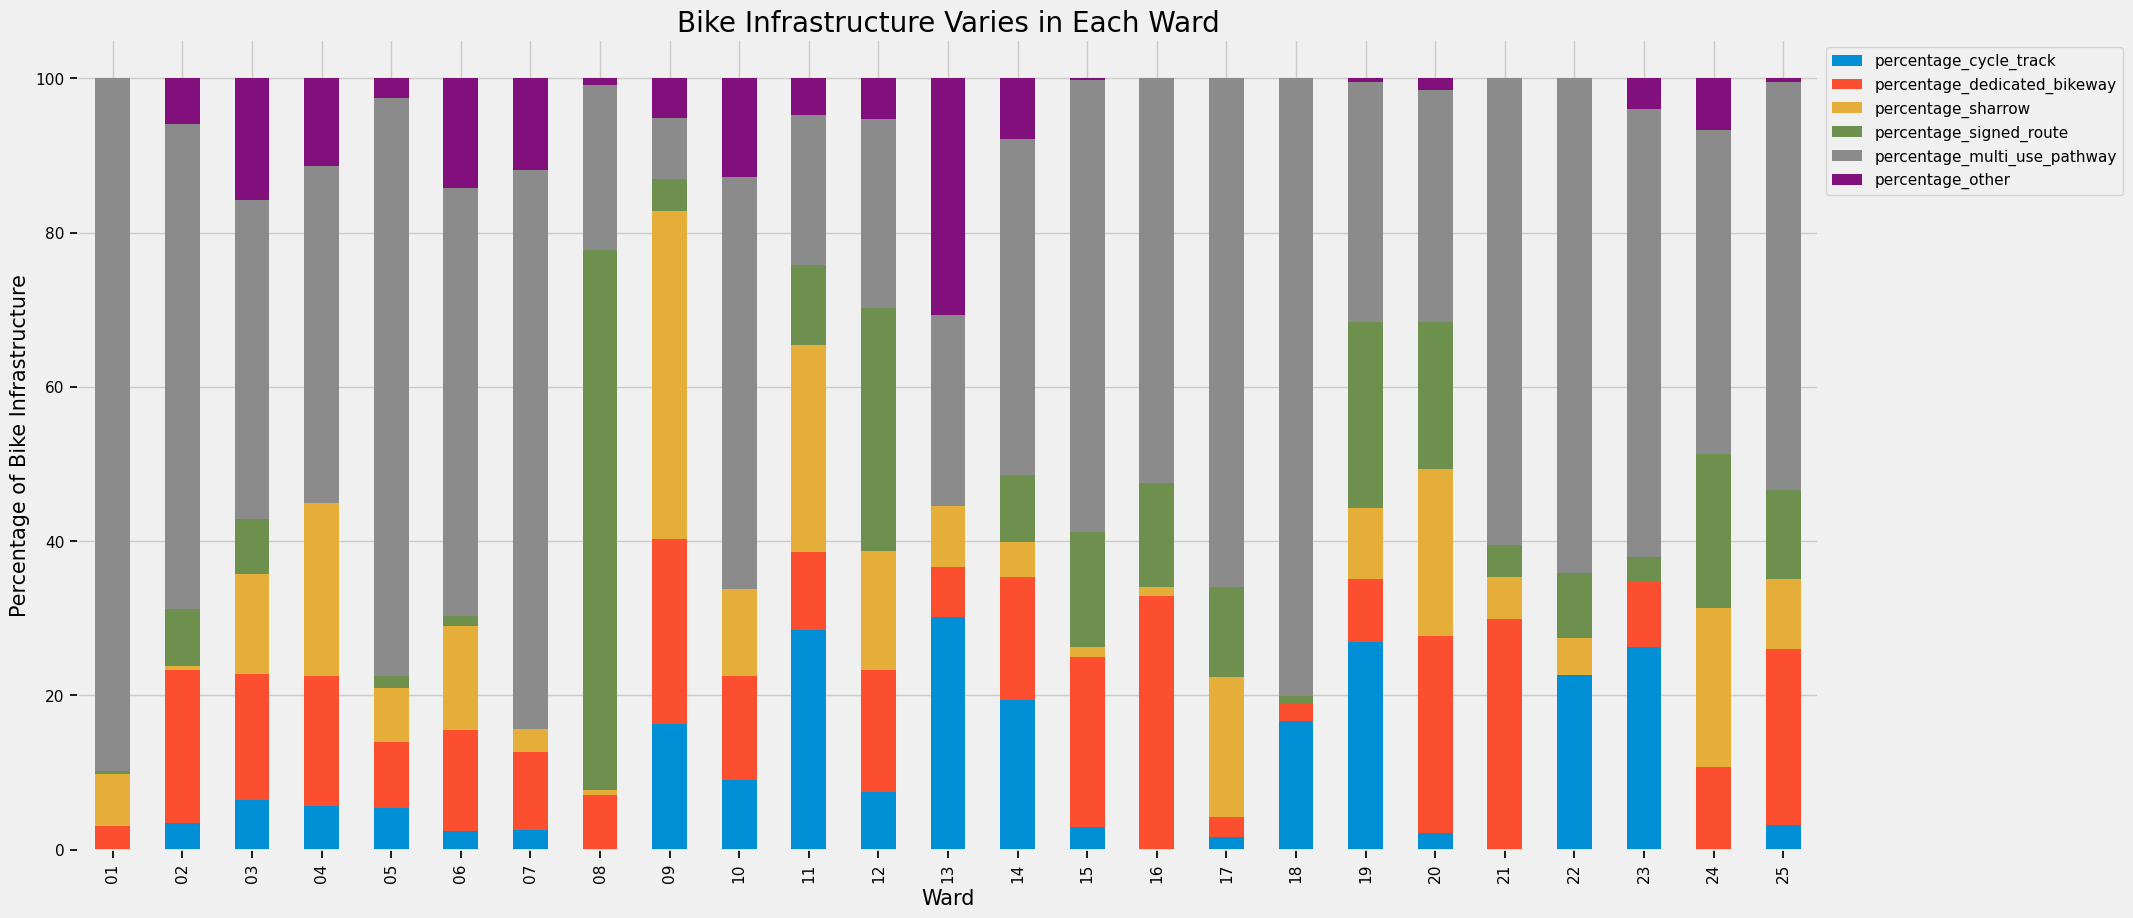

In [61]:
# Plot the stacked bar plot
wards_data[['percentage_cycle_track',
            'percentage_dedicated_bikeway', 
            'percentage_sharrow', 
            'percentage_signed_route', 
            'percentage_multi_use_pathway', 
            'percentage_other', 
            'WARD NUMBER']].set_index('WARD NUMBER', drop=True).plot(kind='bar', stacked=True, figsize=(20, 10))

plt.title("Bike Infrastructure Varies in Each Ward", fontsize=20)
plt.ylabel('Percentage of Bike Infrastructure', fontsize=15)
plt.xlabel('Ward', fontsize=15)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [62]:
# 1) Group the wards_data by district
# 2) Sum the bike lane lengths over this grouping
districts_data = wards_data.groupby('WARD DISTRICT')[['bike_lane_distance', 
                                                      'cycle_track_distance',
                                                      'dedicated_bikeway_distance', 
                                                      'sharrow_distance', 
                                                      'signed_route_distance', 
                                                      'multi_use_path_distance', 
                                                      'other_distance']].sum()

# 3) Calculate proportion of each type of bike lane in each district
districts_data['Cycle Track %'] = (districts_data['cycle_track_distance'] / districts_data['bike_lane_distance'])*100
districts_data['Dedicated Bikeway %'] = (districts_data['dedicated_bikeway_distance'] / districts_data['bike_lane_distance'])*100
districts_data['Sharrow %'] = (districts_data['sharrow_distance'] / districts_data['bike_lane_distance'])*100
districts_data['Signed Route %'] = (districts_data['signed_route_distance'] / districts_data['bike_lane_distance'])*100
districts_data['Multi Use Pathway %'] = (districts_data['multi_use_path_distance'] / districts_data['bike_lane_distance'])*100
districts_data['Other %'] = (districts_data['other_distance'] / districts_data['bike_lane_distance'])*100

# 4) View GeoDataFrame
districts_data.head()

,bike_lane_distance,cycle_track_distance,dedicated_bikeway_distance,sharrow_distance,signed_route_distance,multi_use_path_distance,other_distance,Cycle Track %,Dedicated Bikeway %,Sharrow %,Signed Route %,Multi Use Pathway %,Other %
WARD DISTRICT,,,,,,,,,,,,,
Etobicoke York,221037.303520,8544.918251,29077.708499,12985.614327,9298.136836,143834.914076,17296.011532,3.865826,13.155114,5.874852,4.206592,65.072688,7.824929
North York,204679.827007,5235.230143,31444.462357,13136.227701,38431.359207,109300.016977,7132.530623,2.557766,15.362756,6.417940,18.776330,53.400483,3.484726
Scarborough,189461.716714,13436.084043,32868.384745,21390.998224,22555.187207,95083.103916,4127.958579,7.091715,17.348299,11.290407,11.904879,50.185919,2.178782
Toronto and East York,402589.006635,71892.264832,54396.775785,66112.011060,39669.705198,133557.975356,36960.274403,17.857483,13.511739,16.421713,9.853648,33.174770,9.180647


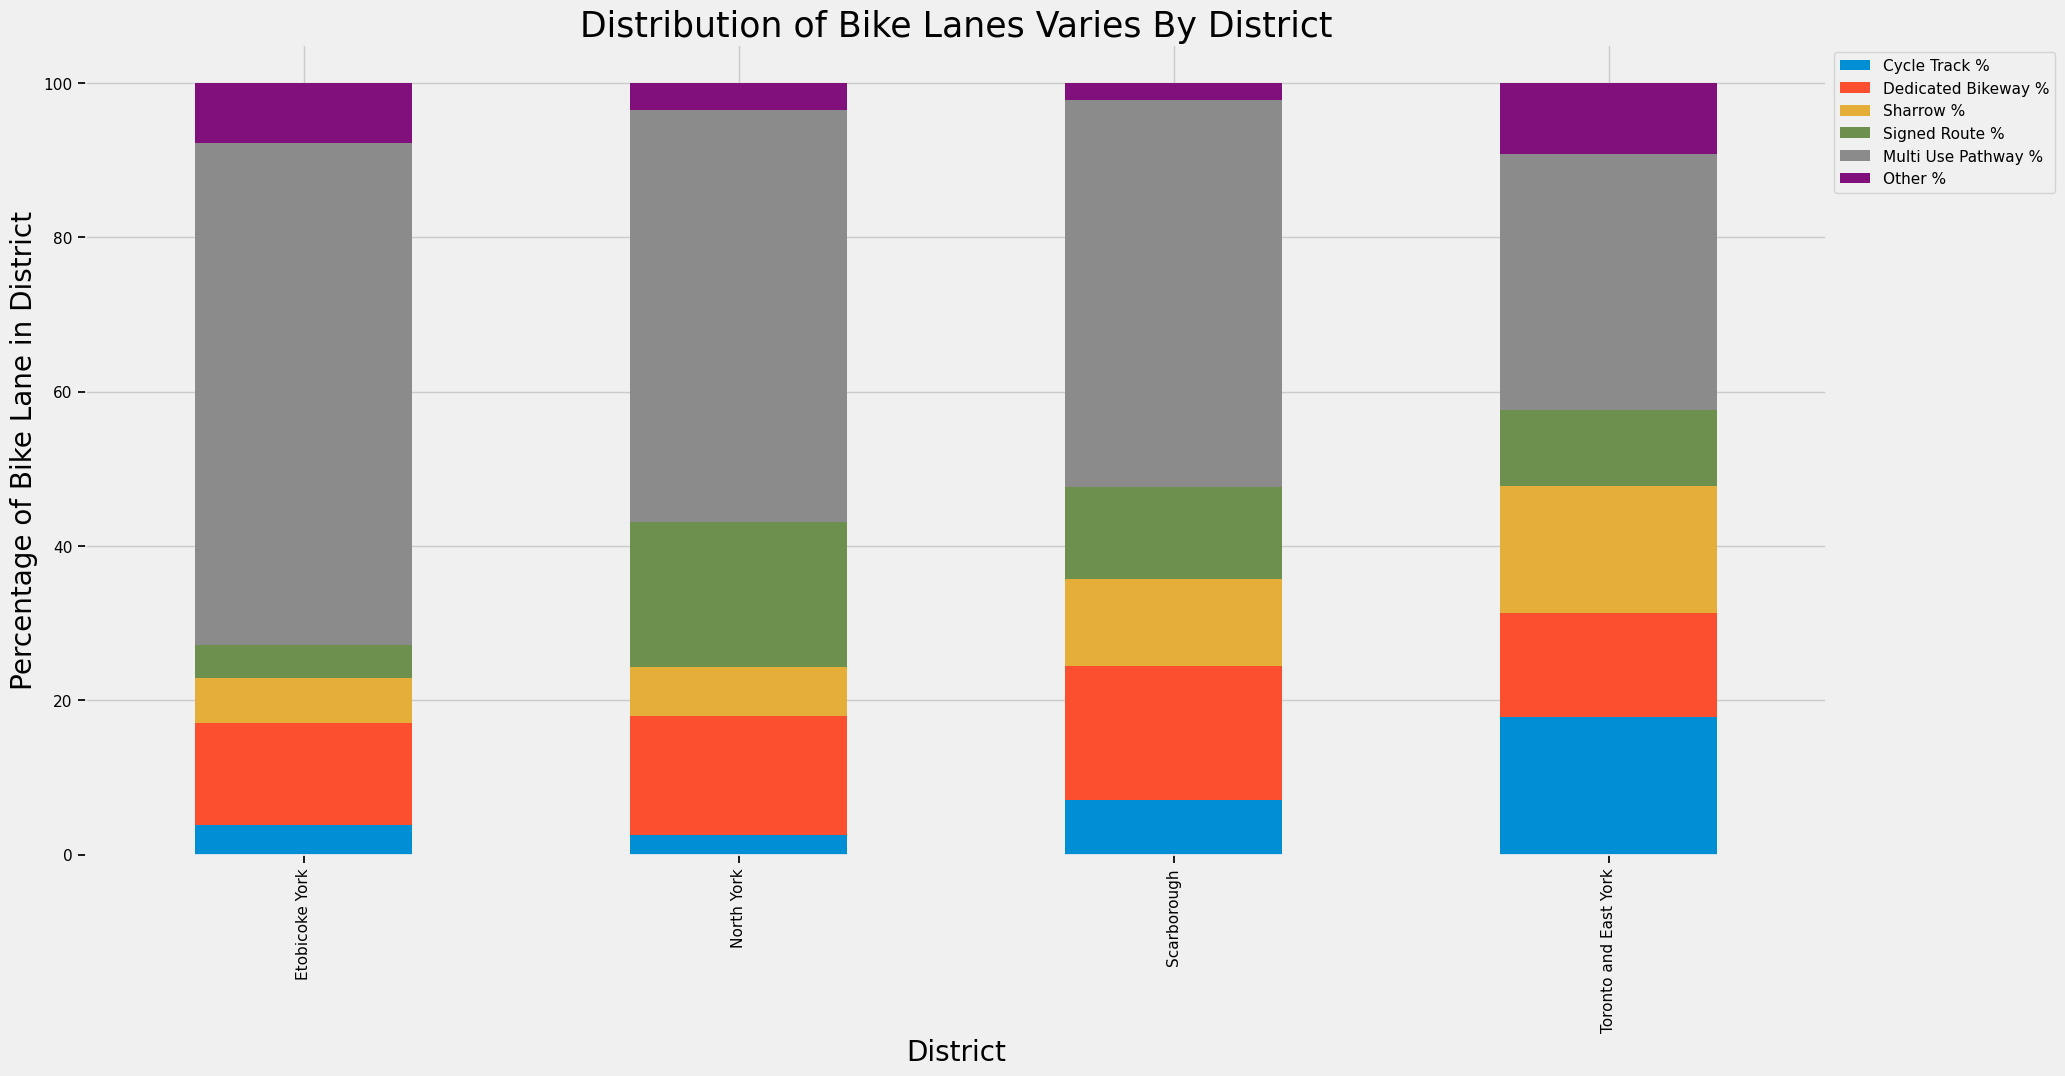

In [63]:
# Plot the stacked bar plot
districts_data[['Cycle Track %',
                'Dedicated Bikeway %', 
                'Sharrow %', 
                'Signed Route %', 
                'Multi Use Pathway %', 
                'Other %']].plot(kind='bar', stacked=True, figsize=(20, 10))

plt.title("Distribution of Bike Lanes Varies By District", fontsize=25)
plt.ylabel('Percentage of Bike Lane in District', fontsize=20)
plt.xlabel('District', fontsize=20)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Next we will visualize the proportion of collisions in each type of bike lane in each community council district

In [65]:
# Import community council boundaries
districts = gpd.read_file('../Ward Data/Community Council Boundaries Data - 4326.geojson')

# Convert CRS to EPSG:32617
districts = districts.to_crs("EPSG:32617")

# View GeoDataFrame
districts.head()

,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,OBJECTID,geometry
0,1,2476922.0,26002906.0,0.0,EA,EA,Scarborough Community Council,Scarborough Community Council,17503889,"MULTIPOLYGON (((648641.476 4852884.680, 648645..."
1,2,2476921.0,26002905.0,0.0,SO,SO,Toronto and East York Community Council,Toronto and East York Community Council,17503905,"MULTIPOLYGON (((637056.976 4841642.218, 637080..."
2,3,2476920.0,26002904.0,0.0,NO,NO,North York Community Council,North York Community Council,17503921,"MULTIPOLYGON (((635795.077 4845734.805, 635815..."
3,4,2476919.0,26002903.0,0.0,WE,WE,Etobicoke York Community Council,Etobicoke York Community Council,17503937,"MULTIPOLYGON (((621686.412 4845586.281, 621698..."


In [66]:
# 1) Buffer the bike lanes to convert the geometry from a multilinestring to a polygon, this allows us to check which collisions intersect each bike lane
buffer_distance = 10  # Offset the bike lane multilinestring by 10 m
bike_lanes_buffered = bicycle_ward_data.copy()
bike_lanes_buffered['geometry'] = bike_lanes_buffered.geometry.buffer(buffer_distance)

# 2) Perform a spatial join between the buffered bike lane polygons and bike collision points
collisions_with_bikelane = gpd.sjoin(bike_collision_data, bike_lanes_buffered, how='inner', predicate='intersects')

# 3) Reset indices of the GeoDataFrames to prevent error in next spatial join
collisions_with_bikelane = collisions_with_bikelane.reset_index(drop=True)
collisions_with_bikelane = collisions_with_bikelane.drop(columns = ['index_right'])

# 4) Perform a spatial join between the collisions_with_bikelane and districts. Predicate = within because we want the entire geometry to be within the district
collisions_with_bikelane_and_district = gpd.sjoin(collisions_with_bikelane, districts, how='inner', predicate='within')

# 5) Group the collisions_with_bikelane_and_district gdf by bike lane type and district. Then, count the collisions in each grouping using .size()
collision_count_by_bikelane_and_district_grouped = collisions_with_bikelane_and_district.groupby(['INFRA_LOWORDER', 'AREA_NAME']).size()

# 6) Convert the INFRA_LOWORDER from index (row) to columns for plotting purposes
collision_count_by_bikelane_and_district_unstacked = collision_count_by_bikelane_and_district_grouped.unstack(level='INFRA_LOWORDER')

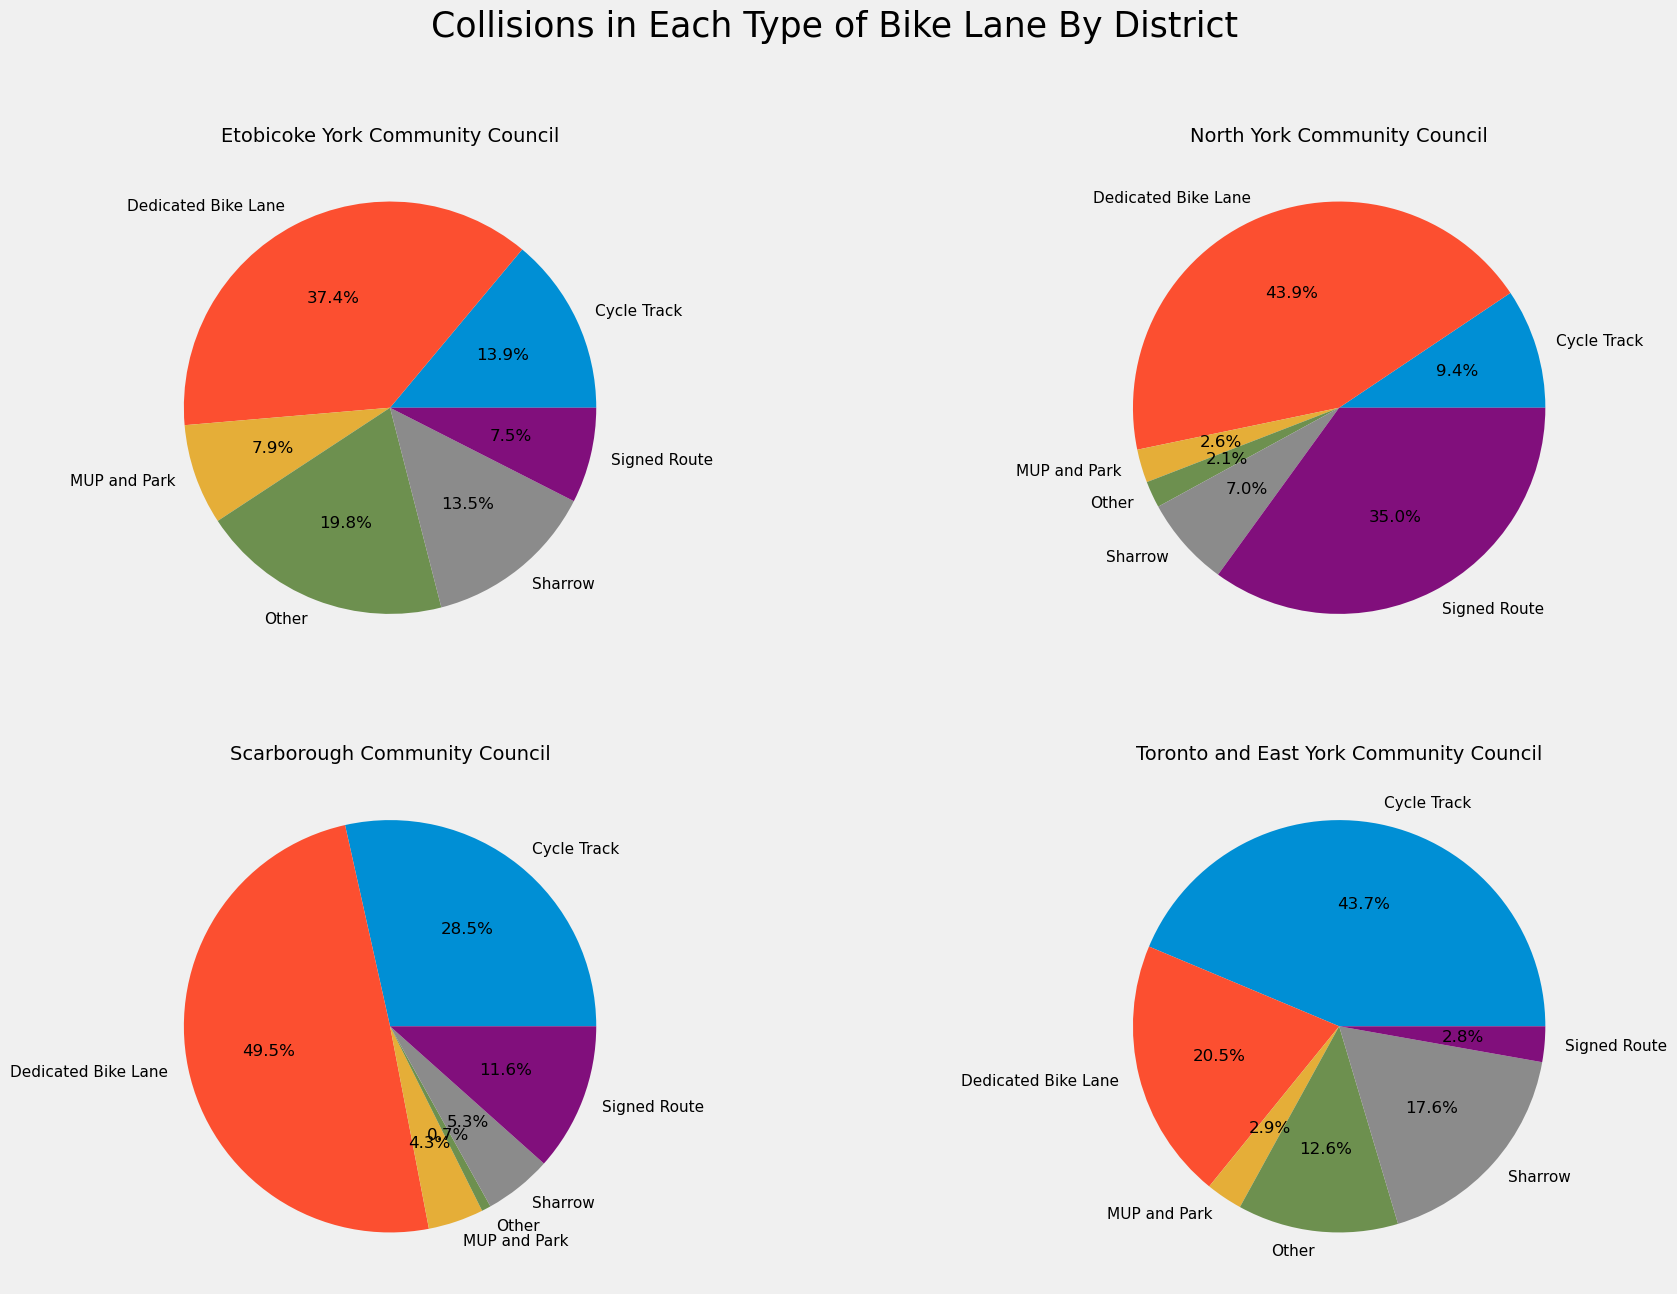

In [67]:
##########################################################################################################################################################
# Plot the results

# Data for pie charts
data = collision_count_by_bikelane_and_district_unstacked.fillna(0) # fillna(0), otherwise pie chart creates an error

# Define the number of plots and their arrangement
fig, axes = plt.subplots(2, 2, figsize=(20, 14))
fig.suptitle("Collisions in Each Type of Bike Lane By District", fontsize=25)

# Define the districts and their corresponding axes
districts = data.index[:4] 
axes = axes.flatten()

# Create a pie chart for each district
for i, district in enumerate(districts):
    ax = axes[i]
    district_data = data.loc[district]
    ax.pie(
        district_data,
        labels=district_data.index,
        autopct='%1.1f%%',

    )
    ax.set_title(district, fontsize=14)

plt.show()
##########################################################################################################################################################


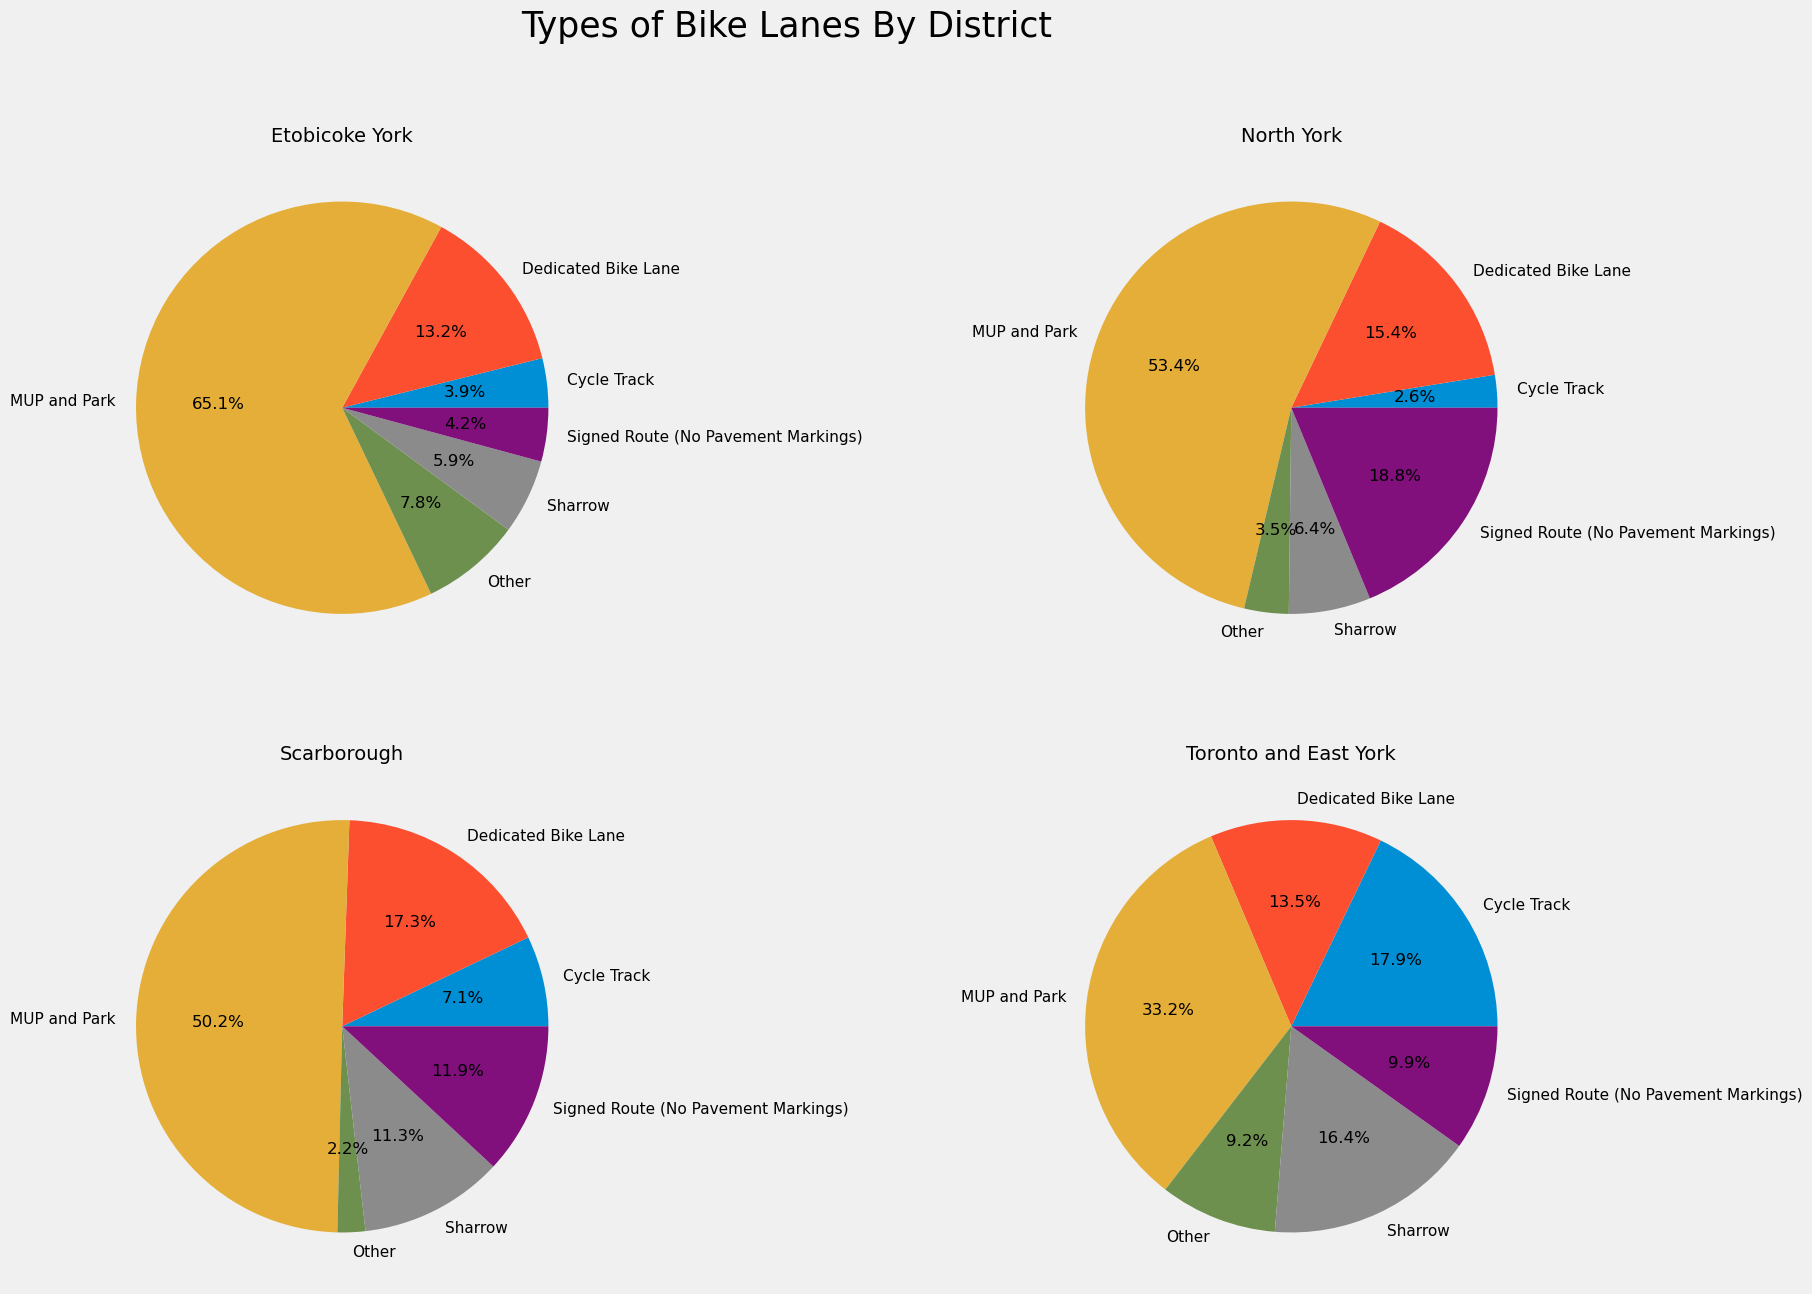

In [68]:
#########################################################################################################################################################
# Data for pie charts
data = districts_data[['cycle_track_distance',
                       'dedicated_bikeway_distance', 
                       'multi_use_path_distance', 
                       'other_distance', 
                       'sharrow_distance', 
                       'signed_route_distance']]

# Define the number of plots and their arrangement
fig, axes = plt.subplots(2, 2, figsize=(20, 14))
fig.suptitle("Types of Bike Lanes By District", fontsize=25)

# Define the districts and their corresponding axes
districts = data.index[:4] 
axes = axes.flatten()

# Create a pie chart for each district
for i, district in enumerate(districts):
    ax = axes[i]
    district_data = data.loc[district]
    ax.pie(
        district_data,
        labels= ['Cycle Track', 'Dedicated Bike Lane', 'MUP and Park', 'Other', 'Sharrow', 'Signed Route (No Pavement Markings)'],
        autopct='%1.1f%%',

    )
    ax.set_title(district, fontsize=14)

plt.show()
##########################################################################################################################################################

Finally we will plot the relationship between distance of bikelanes and number of collisions yearly

In [70]:
# Determine the number of bike collisions each year
bike_collision_data_grouped = bike_collision_data.groupby('YEAR')['BICYCLE'].size().reset_index()

# View DataFrame
bike_collision_data_grouped.head()

,YEAR,BICYCLE
0,2014,1059
1,2015,1130
2,2016,1101
3,2017,943
4,2018,740


In [71]:
# Calculate the length of each bike lane
bicycle_data['length'] = bicycle_data.geometry.length

# Convert to km
bicycle_data['length'] = bicycle_data['length'] / 1000

# Calculate the length of bike lane installed each year
bicycle_data_grouped = bicycle_data.groupby('INSTALLED')['length'].sum().reset_index()

# Calculate the cumulative length of bike lanes each year
bicycle_data_grouped['cumulative_length'] = bicycle_data_grouped['length'].cumsum()

# Filter to relevant year range for collision data (eg 2014-2018)
bicycle_data_grouped = bicycle_data_grouped[bicycle_data_grouped['INSTALLED'] >= 2014]

# View DataFrame
bicycle_data_grouped.head()

,INSTALLED,length,cumulative_length
13,2014,16.393019,628.250689
14,2015,22.130871,650.381560
15,2016,9.452614,659.834174
16,2017,12.988295,672.822469
17,2018,18.471522,691.293990


In [72]:
# Merge the bicycle_data_grouped and bike_collision_data_grouped dataframes to compare length of bike lanes to collisions on a temporal basis
bike_lane_collision_merged = pd.merge(bicycle_data_grouped[['INSTALLED', 'cumulative_length']], bike_collision_data_grouped, left_on='INSTALLED', right_on='YEAR', how='inner')

# View DataFrame
bike_lane_collision_merged.head()

,INSTALLED,cumulative_length,YEAR,BICYCLE
0,2014,628.250689,2014,1059
1,2015,650.381560,2015,1130
2,2016,659.834174,2016,1101
3,2017,672.822469,2017,943
4,2018,691.293990,2018,740


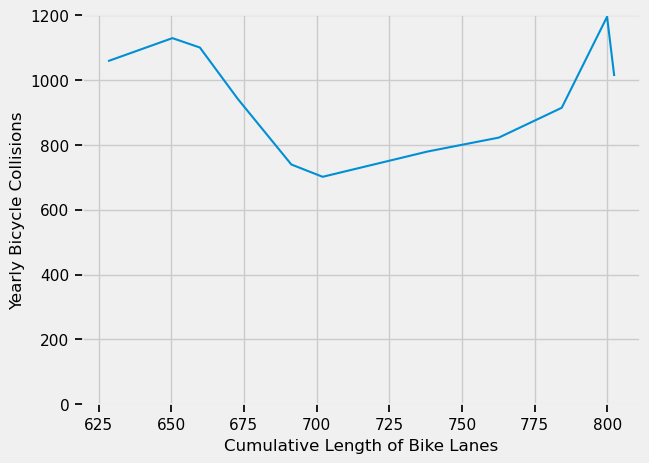

In [73]:
# Plot cumulative length of bikelanes vs number of collisions 
sns.lineplot(x = 'cumulative_length', y = 'BICYCLE', data = bike_lane_collision_merged)

plt.xlabel('Cumulative Length of Bike Lanes')
plt.ylabel('Yearly Bicycle Collisions')
plt.ylim(0, 1200)
plt.show()

In [74]:
# Calculate collision density to normalize collsions to length of bike lane
bike_lane_collision_merged['density'] = bike_lane_collision_merged['BICYCLE'] / bike_lane_collision_merged['cumulative_length']

# View DataFrame
bike_lane_collision_merged.head()

,INSTALLED,cumulative_length,YEAR,BICYCLE,density
0,2014,628.250689,2014,1059,1.685633
1,2015,650.381560,2015,1130,1.737442
2,2016,659.834174,2016,1101,1.668601
3,2017,672.822469,2017,943,1.401558
4,2018,691.293990,2018,740,1.070456


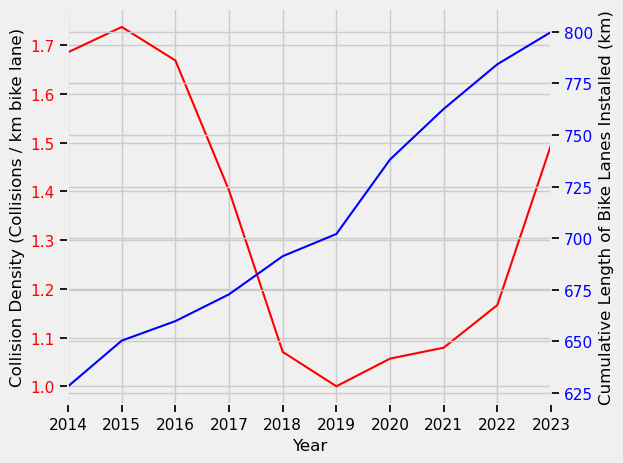

In [75]:
# Plot the collision density vs year and cumulative length of bike lanes vs year on the same axis

fig, ax1 = plt.subplots()
color = 'red'
ax1.set_xlabel('Year')
ax1.set_xlim(2014, 2023) # Don't show 2024 as it is not a complete year's worth of data
ax1.set_ylabel('Collision Density (Collisions / km bike lane)')
ax1.plot(bike_lane_collision_merged['INSTALLED'], bike_lane_collision_merged['density'], color=color) # Plot collision density vs year
ax1.tick_params(axis='y', labelcolor=color) # Set the y-ticks to be the same colour as the ax1 plot

ax2 = ax1.twinx()  # create another axes, ax2, with the the same x-axis as ax1

color = 'blue'
ax2.set_ylabel('Cumulative Length of Bike Lanes (km)') 
ax2.plot(bike_lane_collision_merged['INSTALLED'], bike_lane_collision_merged['cumulative_length'], color=color) # Plot cumulative length of bike lanes vs year
ax2.tick_params(axis='y', labelcolor=color) # Set the y-ticks to be the same colour as the ax2 plot

fig.tight_layout()  # to ensure right y-label is shows completely
plt.show()


<Axes: title={'center': 'Cycle Tracks Account for the Most Bike Collisions Since 2019'}, xlabel='Bike Lane Type', ylabel='Number of Collisions'>

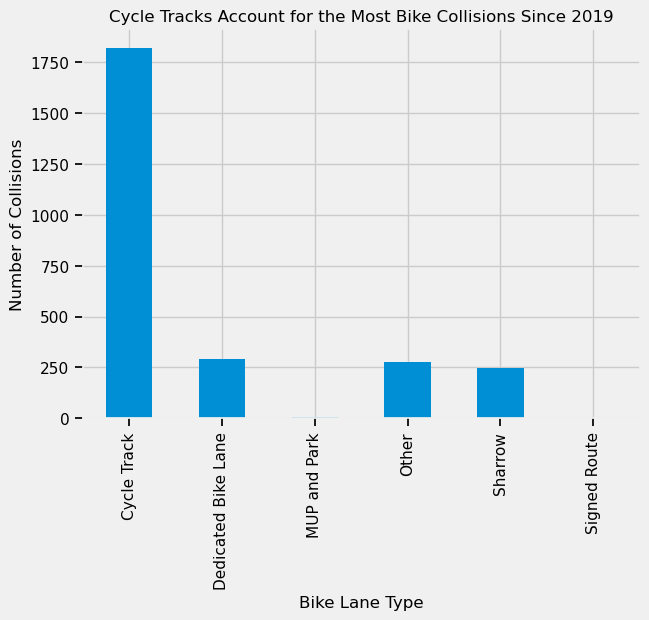

In [79]:
# Filter dataset to only include data from 2019 onwards
collisions_with_bikelane_and_district_filtered = collisions_with_bikelane_and_district[collisions_with_bikelane_and_district['INSTALLED'] >= 2019]

# Group the data by the type of bike lane, sum the collisions in each grouping
collisions_with_bikelane_and_district_filtered_grouped = collisions_with_bikelane_and_district_filtered.groupby('INFRA_LOWORDER')['BICYCLE'].count()

# Plot the results as a bar plot
collisions_with_bikelane_and_district_filtered_grouped.plot(kind='bar', title = 'Cycle Tracks Account for the Most Bike Collisions Since 2019', 
                                                           xlabel = 'Bike Lane Type', ylabel = 'Number of Collisions')

<Axes: title={'center': 'Proportion of Bike Lanes Installed or Updated 2019 Onwards'}, ylabel='length'>

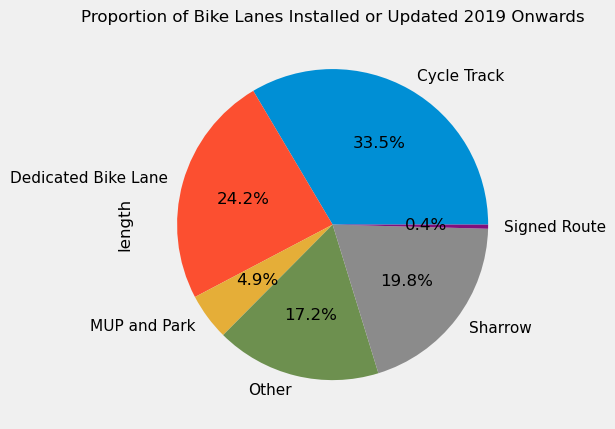

In [80]:
# Filter dataset to only include data from 2019 onwards
bicycle_ward_data_filtered = bicycle_ward_data[((bicycle_ward_data['INSTALLED'] >= 2019) |
                                                (bicycle_ward_data['UPGRADED'] >= 2019))]

# Group the data by the type of bike lane, sum the length in each grouping
bicycle_ward_data_filtered_grouped = bicycle_ward_data_filtered.groupby('INFRA_LOWORDER')['length'].sum()

# Plot the results as a pie plot
bicycle_ward_data_filtered_grouped.plot(kind = 'pie', autopct='%1.1f%%', title='Proportion of Bike Lanes Installed or Updated 2019 Onwards')

<Axes: title={'center': 'Proportion of Bike Lanes Installed or Updated Prior to 2019'}, ylabel='length'>

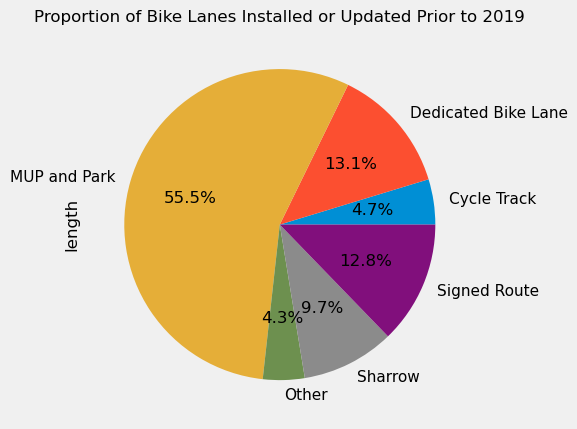

In [81]:
# Filter dataset to only include data from prior to 2019
bicycle_ward_data_filtered = bicycle_ward_data[(bicycle_ward_data['INSTALLED'] < 2019)]

# Group the data by the type of bike lane, sum the length in each grouping
bicycle_ward_data_filtered_grouped = bicycle_ward_data_filtered.groupby('INFRA_LOWORDER')['length'].sum()

# Plot the results as a pie plot
bicycle_ward_data_filtered_grouped.plot(kind = 'pie', autopct='%1.1f%%', title='Proportion of Bike Lanes Installed or Updated Prior to 2019')